<a href="https://colab.research.google.com/github/tradeasystems/colab_test/blob/master/reinforcement_learning_open_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym
!pip install h5py
!pip install keras-rl

     |████████████████████████████████| 40kB 3.1MB/s 
  Created wheel for keras-rl: filename=keras_rl-0.4.2-cp36-none-any.whl size=48379 sha256=ac9768ccb02683a54d5217886f2e0e65536f8f1decc7d74a3c6dc23e4cec9748
  Stored in directory: /root/.cache/pip/wheels/7d/4d/84/9254c9f2e8f51865cb0dac8e79da85330c735551d31f73c894
Successfully built keras-rl


# Car Pole



In [0]:
import gym
import gym
from gym import spaces, envs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

env = gym.make("CartPole-v1")
# env = gym.make("MountainCar-v0")
episodes=10000

In [0]:
env.action_space.n

2

## Random


In [0]:
def RandomLearning(env, episodes):
  reward_list = []
  ave_reward_list = []
  for i in range(episodes):
    observation = env.reset()
    done=False
    rewards=[]
    tot_reward, reward = 0,0
    while done != True:
      # todo UNCOMMENT
      # env.render()
      action = env.action_space.sample() # your agent here (this takes random actions)
      observation, reward, done, info = env.step(action)
      tot_reward += reward
    # Track rewards
    reward_list.append(tot_reward)
    
    if (i+1) % 100 == 0:
        ave_reward = np.mean(reward_list)
        ave_reward_list.append(ave_reward)
        reward_list = []
        
    if (i+1) % 100 == 0:    
        print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
  env.close()
  return ave_reward_list

Episode 100 Average Reward: 22.19
Episode 200 Average Reward: 22.74
Episode 300 Average Reward: 21.87
Episode 400 Average Reward: 19.67
Episode 500 Average Reward: 20.32
Episode 600 Average Reward: 22.49
Episode 700 Average Reward: 22.42
Episode 800 Average Reward: 20.29
Episode 900 Average Reward: 20.21
Episode 1000 Average Reward: 19.82
Episode 1100 Average Reward: 21.36
Episode 1200 Average Reward: 21.31
Episode 1300 Average Reward: 21.34
Episode 1400 Average Reward: 22.65
Episode 1500 Average Reward: 22.66
Episode 1600 Average Reward: 22.33
Episode 1700 Average Reward: 22.75
Episode 1800 Average Reward: 22.06
Episode 1900 Average Reward: 23.23
Episode 2000 Average Reward: 22.57
Episode 2100 Average Reward: 23.82
Episode 2200 Average Reward: 23.95
Episode 2300 Average Reward: 22.65
Episode 2400 Average Reward: 22.61
Episode 2500 Average Reward: 22.94
Episode 2600 Average Reward: 22.72
Episode 2700 Average Reward: 21.15
Episode 2800 Average Reward: 21.95
Episode 2900 Average Reward: 

Text(0.5, 1.0, 'Average Reward vs Episodes')

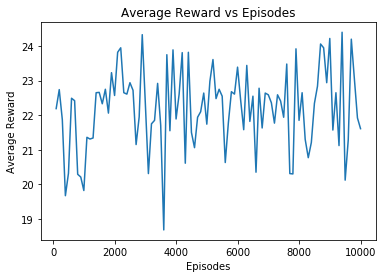

In [0]:
rewards = RandomLearning(env,episodes=episodes)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')     
# plt.close()  

## Q Learn


In [0]:
# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):

    # Discretizing input space to make Q-table and to reduce dimmensionality
    def discretize(obs):
        upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
        lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
        ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
        new_obs = [int(round((self.buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
        new_obs = [min(self.buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
        return tuple(new_obs)

        # Choosing action based on epsilon-greedy policy
    def choose_action(self, state, epsilon):
        return self.env.action_space.sample() if (np.random.random() <= epsilon) else np.argmax(self.Q[state])

    # Updating Q-value of state-action pair based on the update equation
    def update_q(self, state_old, action, reward, state_new, alpha):
        self.Q[state_old][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])

    # Adaptive learning of Exploration Rate
    def get_epsilon(self, t):-
        return max(self.min_epsilon, min(1, 1.0 - math.log10((t + 1) / self.ada_divisor)))

    # Adaptive learning of Learning Rate
    def get_alpha(self, t):
        return max(self.min_alpha, min(1.0, 1.0 - math.log10((t + 1) / self.ada_divisor)))

    shape_array = [100,100,10,10]#[10,100]
    print("Shape array = "+str(shape_array))
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array(shape_array)
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = 0, high = 1, 
                          size = (num_states[0], num_states[1], num_states[2],num_states[3],
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
       
        state_adj = (state - env.observation_space.low)*np.array(shape_array)
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            # todo UNCOMMENT
            # if i >= (episodes - 20):
            #     env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array(shape_array)
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

    

In [0]:
# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, episodes=episodes)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')     
# plt.close()  

Shape array = [100, 100, 10, 10]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in subtract
  """


ValueError: ignored

## Deep RL

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory


def DeepReinforcementLearning(env,episodes, seq_memory_limit=50000,warmup_steps=100, target_model_update=1e-2, optimizer=Adam(lr=1e-3),metrics=['mae']):
  ## create model -> DQNSolver
  nb_actions = env.action_space.n
  model = Sequential()
  model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
  model.add(Dense(16))
  model.add(Activation('relu'))
  model.add(Dense(nb_actions))
  model.add(Activation('linear'))
  # print(model.summary())

  ## train model
  policy = EpsGreedyQPolicy()
  memory = SequentialMemory(limit=seq_memory_limit, window_length=1)
  dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=warmup_steps,
  target_model_update=target_model_update, policy=policy)
  dqn.compile(optimizer=optimizer, metrics=metrics)
  # Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
  # dqn.fit(env, nb_steps=5000, visualize=True, verbose=2)
  history = dqn.fit(env, nb_steps=episodes, visualize=False, verbose=2)
  return dqn,history




In [0]:
model,history=DeepReinforcementLearning(env=env,episodes=episodes)

Training for 5000 steps ...
  200/5000: episode: 1, duration: 1.700s, episode steps: 200, steps per second: 118, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.125 [0.000, 2.000], mean observation: -0.324 [-0.723, 0.008], loss: 0.267459, mean_absolute_error: 0.529255, mean_q: -0.143752
  400/5000: episode: 2, duration: 0.625s, episode steps: 200, steps per second: 320, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.235 [0.000, 2.000], mean observation: -0.315 [-0.875, 0.020], loss: 0.079913, mean_absolute_error: 0.986838, mean_q: -1.159481
  600/5000: episode: 3, duration: 0.645s, episode steps: 200, steps per second: 310, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.065 [0.000, 2.000], mean observation: -0.328 [-0.727, 0.006], loss: 0.032158, mean_absolute_error: 1.864269, mean_q: -2.615932
  800/5000: episode: 4, duration: 0.682s, episode steps: 200, steps per second: 293, episode reward

In [0]:
history.history.values

<function dict.values>

In [0]:
model.test(env, nb_episodes=25, visualize=False)


Testing for 25 episodes ...
Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -200.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -200.000, steps: 200
Episode 6: reward: -200.000, steps: 200
Episode 7: reward: -200.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -200.000, steps: 200
Episode 10: reward: -200.000, steps: 200
Episode 11: reward: -200.000, steps: 200
Episode 12: reward: -200.000, steps: 200
Episode 13: reward: -200.000, steps: 200
Episode 14: reward: -200.000, steps: 200
Episode 15: reward: -200.000, steps: 200
Episode 16: reward: -200.000, steps: 200
Episode 17: reward: -200.000, steps: 200
Episode 18: reward: -200.000, steps: 200
Episode 19: reward: -200.000, steps: 200
Episode 20: reward: -200.000, steps: 200
Episode 21: reward: -200.000, steps: 200
Episode 22: reward: -200.000, steps: 200
Episode 23: reward: -200.000, steps: 200
Episode 24: reward: -200.000, steps: 2